# MALL_CUSTOMER SEGMENTATION


The introduction to mall customer segmentation typically highlights the growing importance of understanding consumer behavior in competitive retail environments. It infers that businesses, especially shopping malls, must cater to diverse customer groups with varying preferences, purchasing power, and shopping habits.
<br><br>

- The underlying assumption is that not all customers contribute equally to a mall's revenue, and by segmenting them into meaningful groups—based on factors such as age, income, spending score, or frequency of visits—retailers can tailor marketing strategies, optimize store placement, and improve customer satisfaction.
<br><br>

From this, we infer that:


- Data-driven insights are essential for effective **customer relationship management** (CRM).


The segmentation helps in targeted promotions and personalized experiences.


 - In this project , we are using machine learning and **clustering** algorithms like `K-Means` to uncover hidden patterns in customer data.
<br><br>

Ultimately, the introduction suggests that customer segmentation is not just a theoretical tool, but a practical necessity for maximizing business performance in retail spaces.

#1.**Understanding the Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


The dataset typically used for **mall customer segmentation** contains demographic and behavioral attributes of customers, such as:


- CustomerID – A unique identifier (often not used in clustering).

- Gender – Categorical variable (Male/Female).

- Age – Numerical; reflects generational shopping patterns.

- Annual Income (k$) – Numerical; indicates purchasing power.

- Spending Score (1–100) – Numerical; based on customer behavior and purchasing data assigned by the mall.
<br><br>

From this data, we can infer that:

- The features selected are simple yet powerful in identifying **consumer clusters**.

- `Spending Score` is a key metric derived by the mall, likely influenced by purchase frequency, amount, and loyalty.

- The dataset enables unsupervised learning techniques like `K-Means` clustering to uncover natural groupings within customers (e.g., high income–low spenders, low income–high spenders).
<br><br>

It allows marketers to profile segments such as:

- Young, low-income but **high-spending customers** (potential influencers).

- Older, high-income but **low-spending individuals** (conservative buyers).

The simplicity and cleanliness of the dataset make it ideal for beginners in data science and machine learning.

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


OBSERVATION

Here, we see that dataset has **RangeIndex** of `200` entries (0-199) and it has `5` columns (one object and 4 integer dtype)with each consisting `non-null` data in them.

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


##Gender (Categorical)


- Top: Most common gender (likely "Female" or "Male").

- Freq: Count of the most frequent gender.

- Unique: Usually `2` (Male, Female).

**Inference:** Gender distribution can reveal if marketing needs to be gender-targeted. A skewed distribution may affect segment balance.

<br><br>

##Age (Numerical)
- Mean, Min, Max: Helps identify the `average age` and `range`.

- Std: Tells you how diverse the age group is.

**Inference:** If the age range is wide and standard deviation is `high`, customer base is diverse in age, requiring `age-specific` marketing strategies.
<br><br>


##Annual Income (k$) (Numerical)
- Mean & Std: Shows typical income and income spread.

- Min & Max: Can detect `outliers` or identify potential high-spending customers.

**Inference:** A wider income range suggests the mall attracts both budget and premium customers, allowing for tiered offerings.
<br><br>



##Spending Score (1–100) (Numerical)
- Mean & Std: Gives an idea of average customer engagement.

- Min & Max: Shows extremes in `spending behavior`.

**Inference:** If the score is uniformly distributed or bimodal, segmentation becomes more meaningful (e.g., identifying high-value vs. low-value customers).
<br><br>



##Overall Inference:
- The dataset contains balanced and interpretable features, suitable for clustering algorithms.



- Patterns in describe() output (e.g., high standard deviation in income or spending score) hint at the existence of distinct customer groups, justifying segmentation.


- Categorical features like Gender and numerical statistics together allow for multidimensional segmentation (e.g., targeting young, high-income females).

In [ ]:
df.loc[3]

,3
CustomerID,4
Gender,Female
Age,23
Annual Income (k$),16
Spending Score (1-100),77


In [ ]:
df.loc[2]

,2
CustomerID,3
Gender,Female
Age,20
Annual Income (k$),16
Spending Score (1-100),6


In [ ]:
df.loc[1]

,1
CustomerID,2
Gender,Male
Age,21
Annual Income (k$),15
Spending Score (1-100),81


In [ ]:
df.iloc[2]

,2
CustomerID,3
Gender,Female
Age,20
Annual Income (k$),16
Spending Score (1-100),6


#**2.Data Cleaning**

In [ ]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
Age_Category,0
Cluster,0
Cluster_by_AgeCategory,0
Age_Cluster,0
Cluster_by_Gender,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


**Obervation**<br>
here we can see that there are no duplicates and null values in the data

#**3.Data Visualisation**

<Axes: >

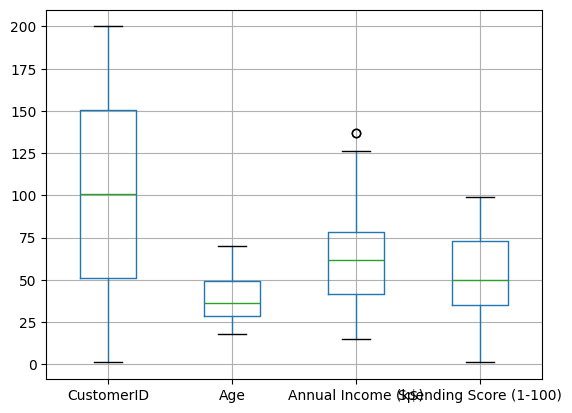

In [ ]:
df.boxplot()

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

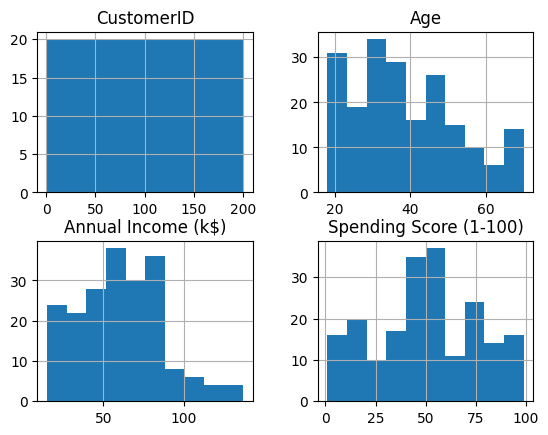

In [ ]:
df.hist()

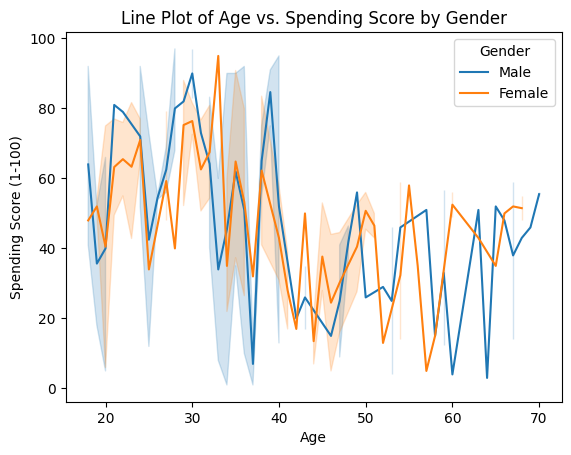

In [ ]:
# line plot of age with gender as legend

import matplotlib.pyplot as plt
sns.lineplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Line Plot of Age vs. Spending Score by Gender')
plt.show()

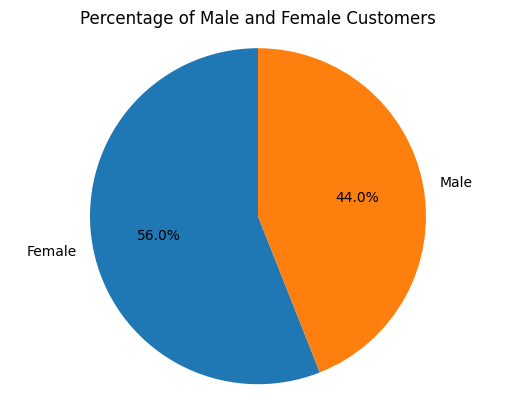

In [ ]:
import matplotlib.pyplot as plt
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Male and Female Customers')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**OBSERVATION:**<br>
Here,as we can see the percentages of males and females visiting the mall.


In [ ]:
values=df['Gender'].value_counts()
values

,count
Gender,
Female,112
Male,88


##4.Data Visualisation and Exploratory Data Analysis (EDA) Inferences
**Gender Distribution**

- Both genders are fairly represented, with a slight skew (often more females than males in sample datasets).

**Age Distribution**

- Majority of customers are between 20 to 40 years.

- Very few customers are below 18 or above 60.

**Annual Income**

- Most customers earn between $40k and $70k annually.

- A few customers have high income > $100k — potential premium segment.

**Spending Score**

- Spending scores are spread across the entire 0–100 range.

- Some low-income individuals have high spending scores, indicating spending habits are not strictly income-based.

**Age vs. Spending Score**

- Younger customers (20s and early 30s) tend to have higher spending scores.

- Older customers tend to have more moderate scores.

**Income vs. Spending Score**

- No strong linear correlation.

- Middle-income groups show wide variation in spending — targetable with personalized strategies.

**Gender vs. Spending**

- Minor differences in spending behavior by gender, but not significant enough for gender-based segmentation alone.

**Outliers**

- A few outliers exist in income and spending score, but can be retained as they may represent valid premium customers.

In [ ]:
import pandas as pd
# Assuming the age counts are stored in variables c, a, b, d from the previous code.
# Let's create a list of these counts.
age_counts_list = [c, a, b, d]

# Create a list of corresponding age ranges
age_ranges = ['<18', '18-35', '35-50', '>50']

# Create a new DataFrame or series to store the organized age counts
age_distribution = pd.DataFrame({
    'Age Range': age_ranges,
    'Count': age_counts_list
})

# Display the organized age counts
print(age_distribution)

# You can also add this as a new column to the original DataFrame if needed,
# although this specific representation is more of a summary.
# If you wanted to categorize each customer's age, you could do something like:
def categorize_age(age):
  if age < 18:
    return '<18'
  elif 18 <= age < 35:
    return '18-35'
  elif 35 <= age < 50:
    return '35-50'
  else:
    return '>50'

df['Age_Category'] = df['Age'].apply(categorize_age)

# Display the DataFrame with the new Age_Category column
print("\nDataFrame with Age Category:")
print(df[['Age', 'Age_Category']].head())


  Age Range  Count
0       <18      0
1     18-35     85
2     35-50     57
3       >50     40

DataFrame with Age Category:
   Age Age_Category
0   19        18-35
1   21        18-35
2   20        18-35
3   23        18-35
4   31        18-35


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Age_Category            200 non-null    object
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [ ]:
df['Age_Category']

,Age_Category
0,18-35
1,18-35
2,18-35
3,18-35
4,18-35
...,...
195,35-50
196,35-50
197,18-35
198,18-35


**Inference After Creating an Age Category Column:**<br>

Understanding the age column by 4 sections

- Teen (13–19)

- Young Adult (20–35)

- Adult (36–50)

- Senior (51+)

**Benefits and Observations:**
1. Enhanced Customer Profiling <br>
- You can now analyze spending patterns across age groups.

For example, Young Adults may have moderate income but high spending scores, indicating impulse buying or trend-driven behavior.

2. Segment-wise Marketing Strategy<br>
- Teens: Likely low income but could be high spenders on fashion, gaming, food.

- Young Adults: High engagement, great target for promotions and loyalty programs.

- Adults: Stable income, selective spenders — ideal for premium stores.

- Seniors: Possibly low spending scores — may require comfort-based or essential services.

3. Cluster Analysis Becomes More Meaningful
- Age Category adds an interpretable layer to the clusters created using algorithms like K-Means.

You can validate clusters by checking if similar Age Categories fall in the same group.

4. Balanced Demographics Check
- Using value_counts() on the new column reveals if the dataset is biased toward a particular age group.

If Young Adults dominate the data, it indicates the mall is most appealing to that demographic — helpful for planning store types and promotions.

5. Cross-Analysis with Other Features
- You can now easily perform grouped analysis.

**Final Inference:**<br>
The Age Category column transforms raw age data into actionable customer segments, enabling:

- Smarter targeting,

- Better visualizations,

- Richer business insights.

It's a simple yet powerful step to bridge data and business strategy.

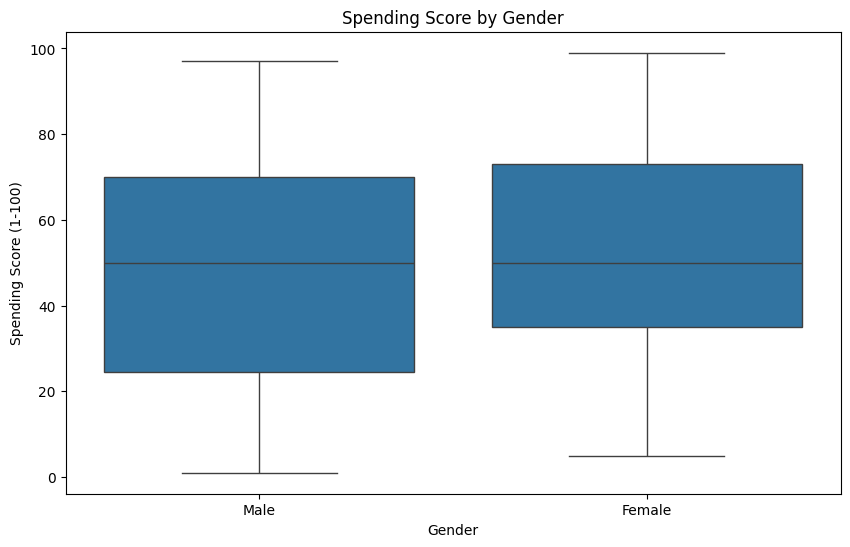

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

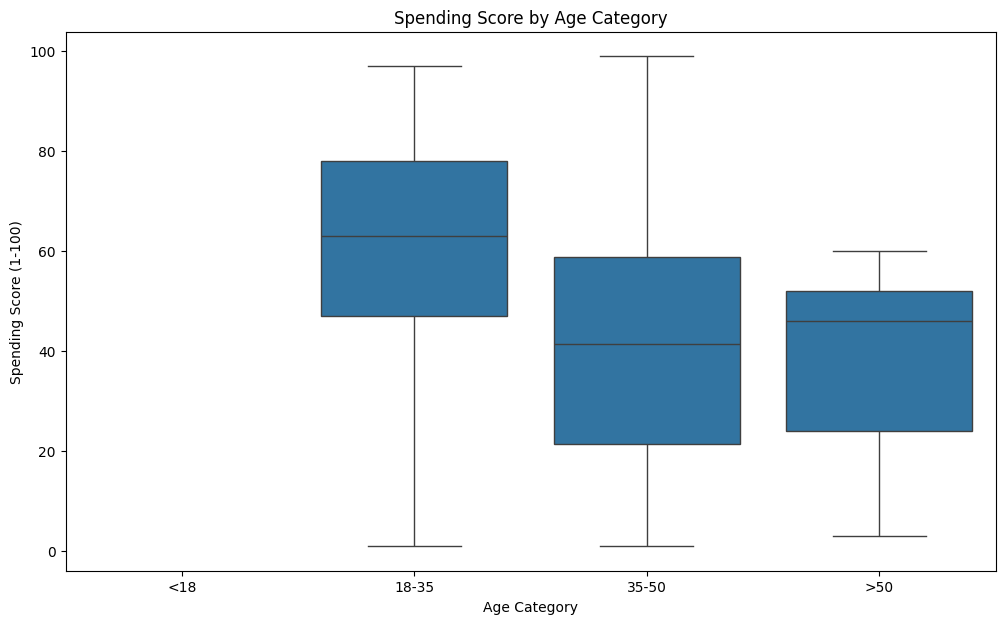

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
sns.boxplot(x='Age_Category', y='Spending Score (1-100)', data=df, order=['<18', '18-35', '35-50', '>50'])
plt.title('Spending Score by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Spending Score (1-100)')
plt.show()

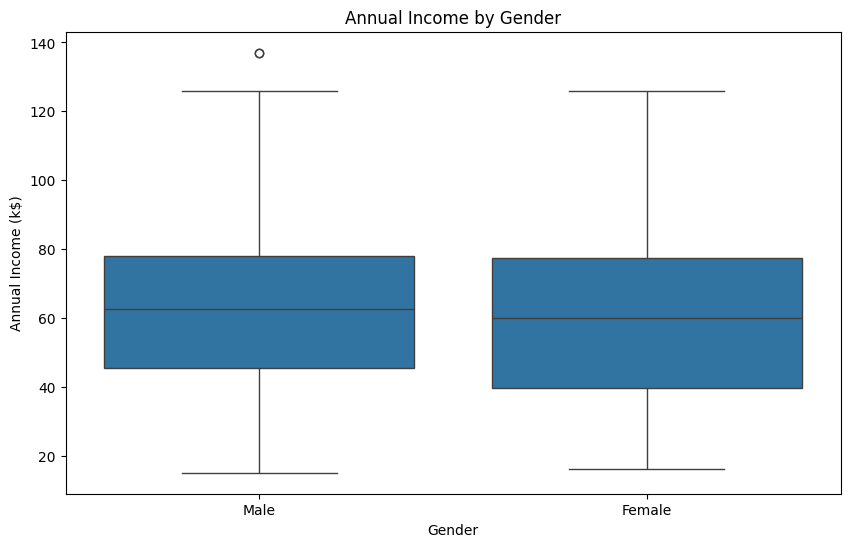

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()

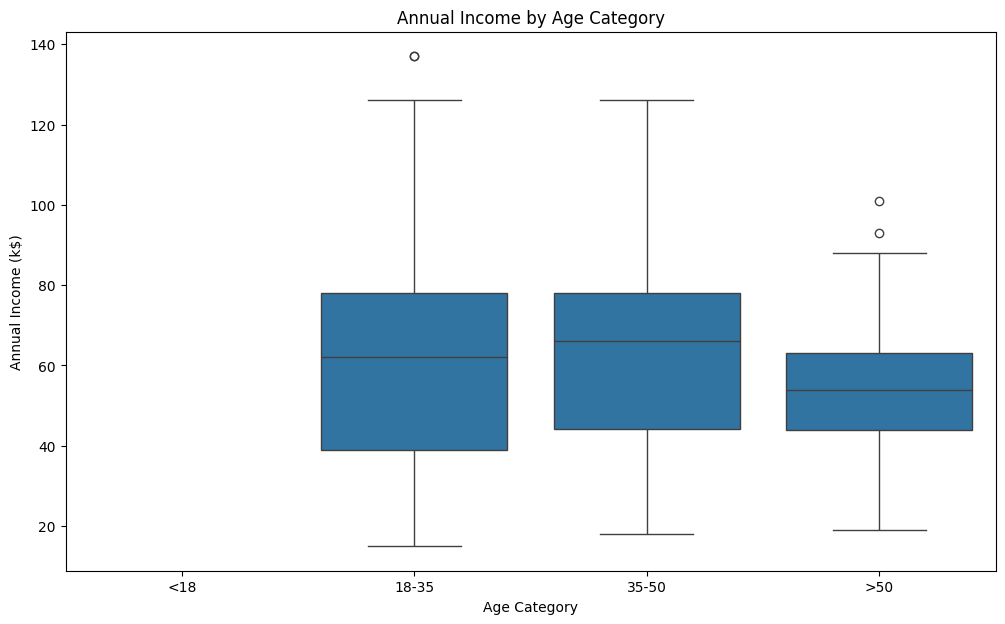

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
sns.boxplot(x='Age_Category', y='Annual Income (k$)', data=df, order=['<18', '18-35', '35-50', '>50'])
plt.title('Annual Income by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Annual Income (k$)')
plt.show()

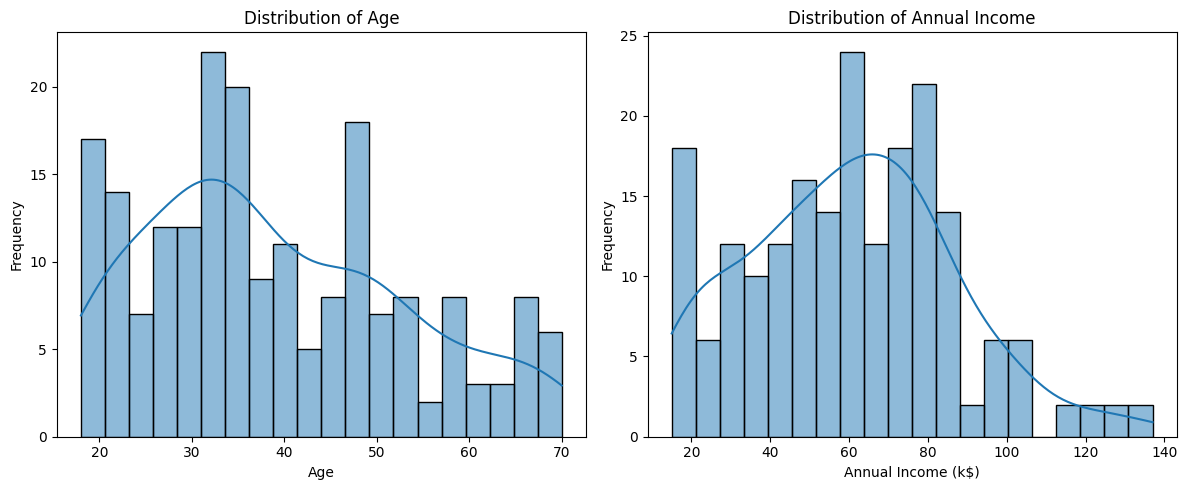

In [ ]:
import matplotlib.pyplot as plt
# Histograms of Age and Annual Income
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Observations<br>
Here the data is normalised

Identified Outliers based on Annual Income (k$):
     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
198         199   Male   32                 137                      18   
199         200   Male   30                 137                      83   

    Age_Category  
198        18-35  
199        18-35  


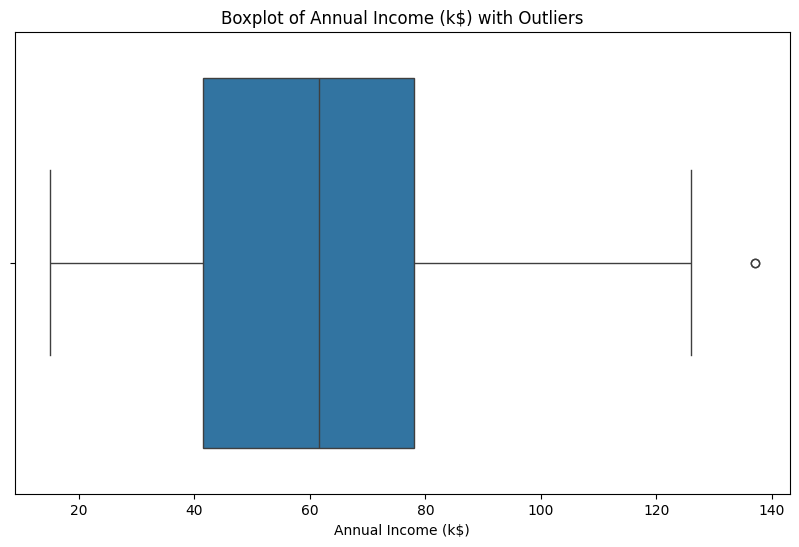

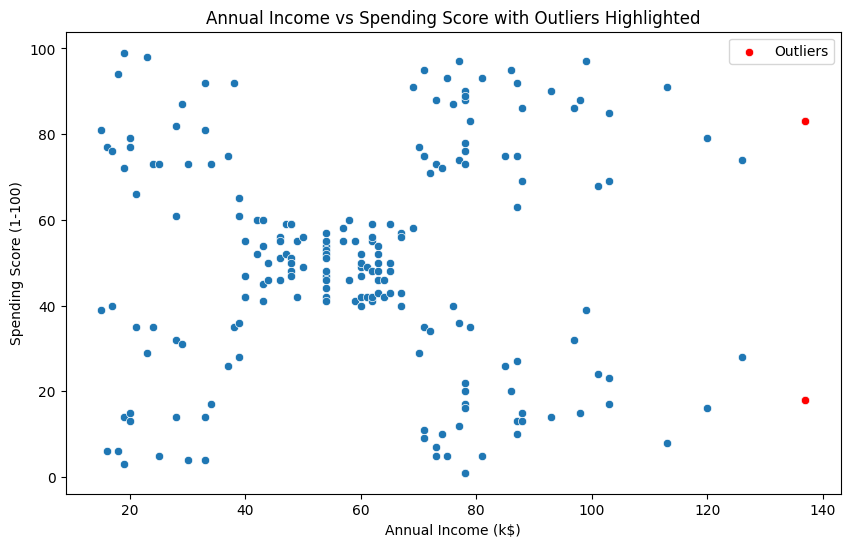


Identified Outliers based on Spending Score (1-100):
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100), Age_Category]
Index: []


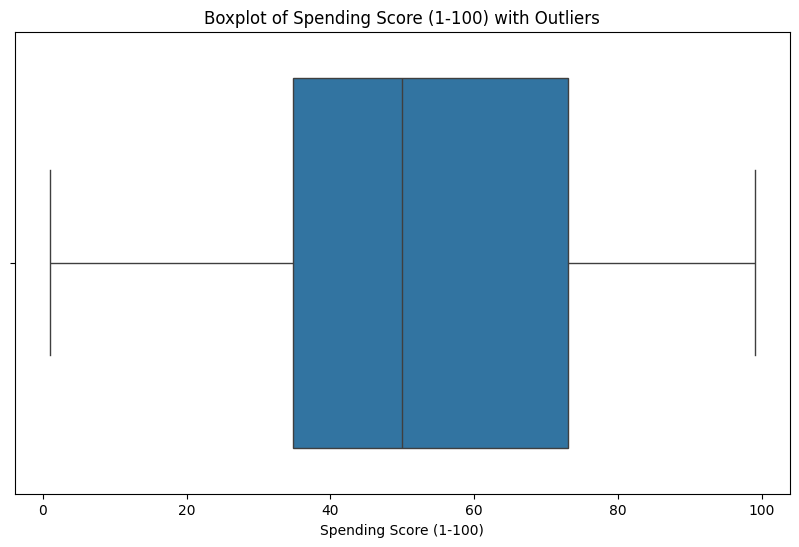

/tmp/ipython-input-70-3013260915.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


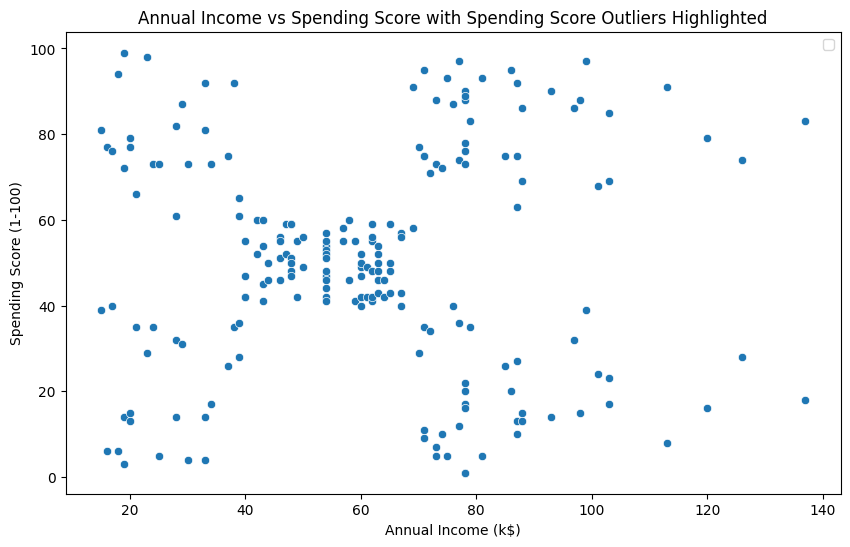

In [ ]:
import matplotlib.pyplot as plt
# Identifying outliers using the IQR method for 'Annual Income (k$)'
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Annual Income (k$)'] < lower_bound) | (df['Annual Income (k$)'] > upper_bound)]

print("Identified Outliers based on Annual Income (k$):")
print(outliers)

# Plotting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Boxplot of Annual Income (k$) with Outliers')
plt.xlabel('Annual Income (k$)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=outliers, color='red', label='Outliers')
plt.title('Annual Income vs Spending Score with Outliers Highlighted')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# You can repeat this process for other numerical columns like 'Spending Score (1-100)'
Q1_spending = df['Spending Score (1-100)'].quantile(0.25)
Q3_spending = df['Spending Score (1-100)'].quantile(0.75)
IQR_spending = Q3_spending - Q1_spending

lower_bound_spending = Q1_spending - 1.5 * IQR_spending
upper_bound_spending = Q3_spending + 1.5 * IQR_spending

outliers_spending = df[(df['Spending Score (1-100)'] < lower_bound_spending) | (df['Spending Score (1-100)'] > upper_bound_spending)]

print("\nIdentified Outliers based on Spending Score (1-100):")
print(outliers_spending)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Boxplot of Spending Score (1-100) with Outliers')
plt.xlabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=outliers_spending, color='red', label='Outliers (Spending Score)')
plt.title('Annual Income vs Spending Score with Spending Score Outliers Highlighted')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

##OBSERVATION

The column shows 1 or 2 outliers, which are statistically insignificant and can be neglected without affecting the overall analysis.

#**5a.Data Clustering (using k-means)**

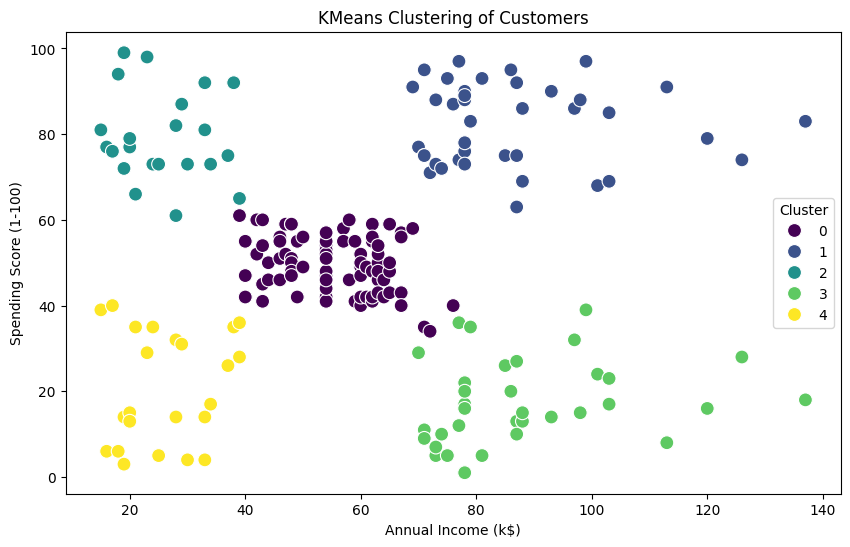

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters (e.g., using the Elbow Method)
# For demonstration, let's choose 5 clusters based on common analysis for this dataset
n_clusters = 5

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Add n_init
df['Cluster'] = kmeans.fit_predict(X)

# Plot the clusters using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('KMeans Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


Applying KMeans for Age Category: 18-35


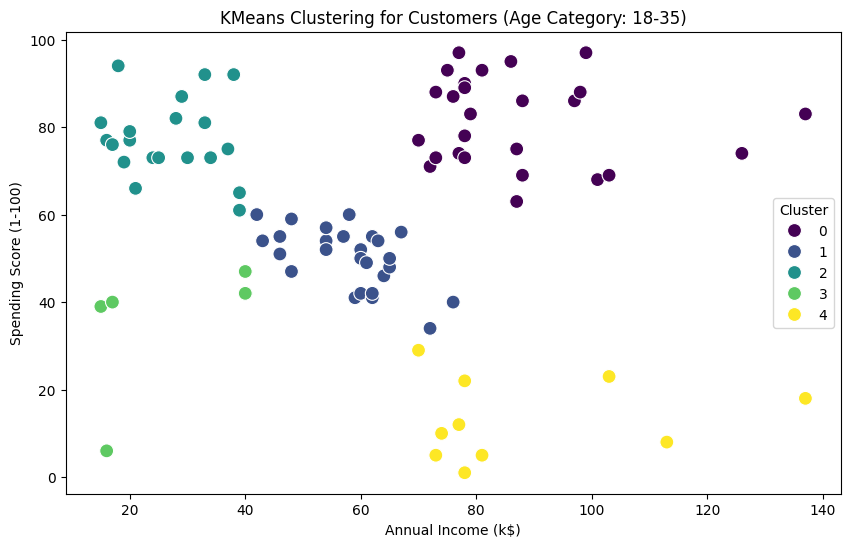


Applying KMeans for Age Category: 35-50


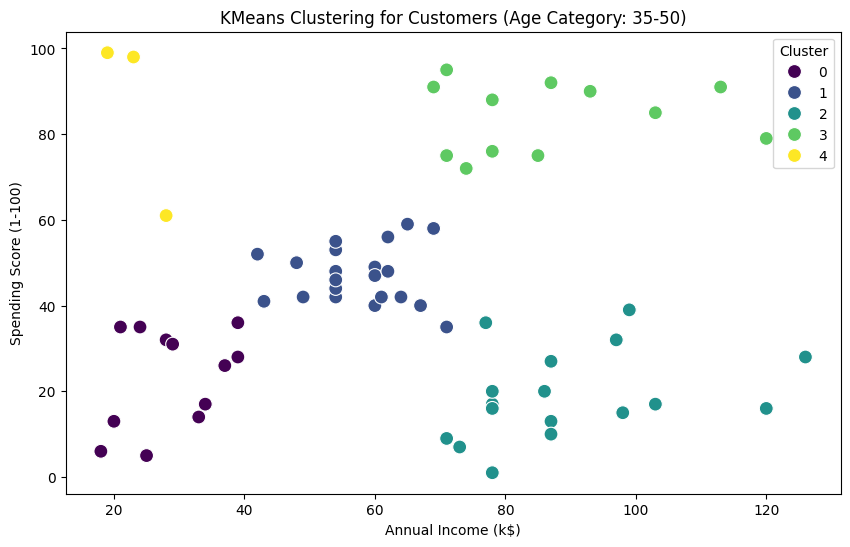


Applying KMeans for Age Category: >50


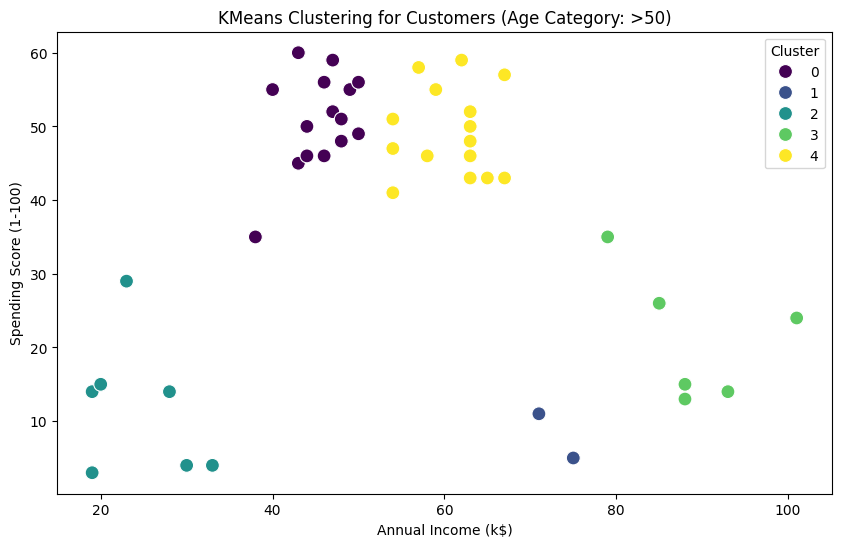


DataFrame with Clusters assigned within each Age Category:
  Age_Category  Annual Income (k$)  Spending Score (1-100)  \
0        18-35                  15                      39   
1        18-35                  15                      81   
2        18-35                  16                       6   
3        18-35                  16                      77   
4        18-35                  17                      40   

   Cluster_by_AgeCategory  
0                     3.0  
1                     2.0  
2                     3.0  
3                     2.0  
4                     3.0  


In [ ]:
import matplotlib.pyplot as plt
# To apply K-Means clustering by age category, we need to perform clustering separately for each age category.

age_categories = df['Age_Category'].unique()

for category in age_categories:
    # Filter the DataFrame for the current age category
    df_category = df[df['Age_Category'] == category].copy()

    # Select the features for clustering (Income and Spending Score)
    X_category = df_category[['Annual Income (k$)', 'Spending Score (1-100)']]

    # Check if there are enough data points for clustering in this category
    if len(X_category) < n_clusters:
        print(f"\nNot enough data points ({len(X_category)}) in age category '{category}' to form {n_clusters} clusters.")
        continue

    print(f"\nApplying KMeans for Age Category: {category}")

    # Apply KMeans clustering for the current category
    # Determine the optimal number of clusters for each category if needed,
    # but for simplicity, we'll use the same n_clusters = 5
    kmeans_category = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df_category.loc[:, 'Cluster'] = kmeans_category.fit_predict(X_category)

    # Plot the clusters for the current age category
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df_category, palette='viridis', s=100)
    plt.title(f'KMeans Clustering for Customers (Age Category: {category})')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend(title='Cluster')
    plt.show()

    # You can also store the clustered data back into the main DataFrame if needed
    # One way to do this is to update the 'Cluster' column in the original df based on index
    df.loc[df_category.index, 'Cluster_by_AgeCategory'] = df_category['Cluster']

# After the loop, you can inspect the main DataFrame to see the clusters assigned within each age category
print("\nDataFrame with Clusters assigned within each Age Category:")
print(df[['Age_Category', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_by_AgeCategory']].head())


Applying KMeans for Gender: Male


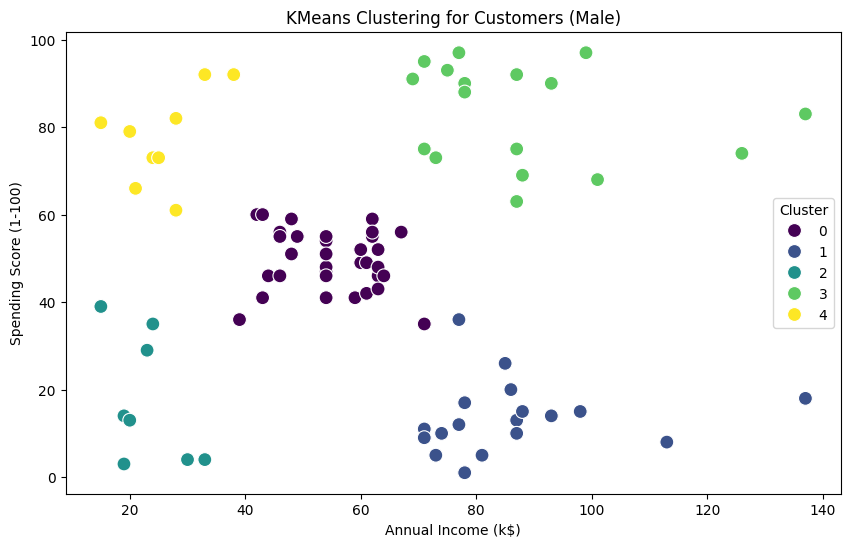


Applying KMeans for Gender: Female


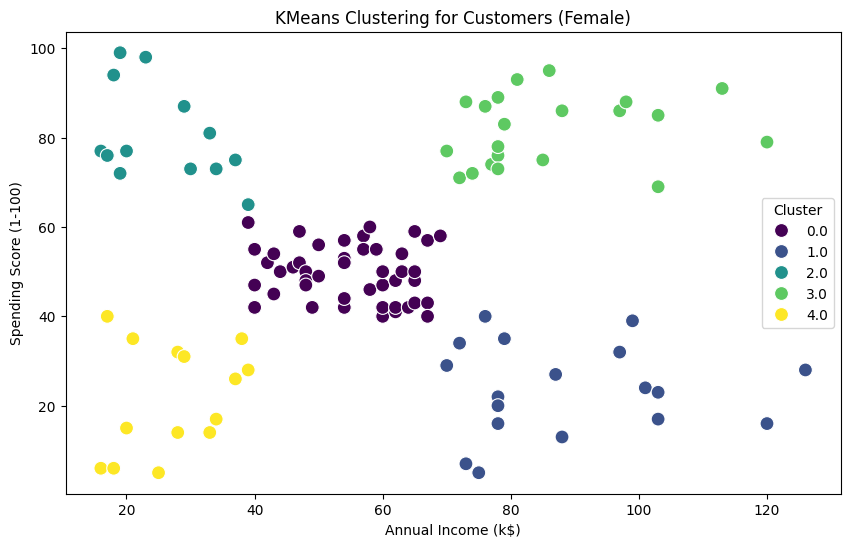


DataFrame with Clusters assigned within each Gender:
   Gender  Annual Income (k$)  Spending Score (1-100)  Cluster_by_Gender
0    Male                  15                      39                2.0
1    Male                  15                      81                4.0
2  Female                  16                       6                4.0
3  Female                  16                      77                2.0
4  Female                  17                      40                4.0


In [ ]:
import matplotlib.pyplot as plt
# To apply K-Means clustering by gender, we need to perform clustering separately for each gender.

genders = df['Gender'].unique()
n_clusters_gender = 5  # You might want to determine optimal clusters per gender

for gender in genders:
    # Filter the DataFrame for the current gender
    df_gender = df[df['Gender'] == gender].copy()

    # Select the features for clustering (Income and Spending Score)
    X_gender = df_gender[['Annual Income (k$)', 'Spending Score (1-100)']]

    # Check if there are enough data points for clustering in this gender
    if len(X_gender) < n_clusters_gender:
        print(f"\nNot enough data points ({len(X_gender)}) for gender '{gender}' to form {n_clusters_gender} clusters.")
        continue

    print(f"\nApplying KMeans for Gender: {gender}")

    # Apply KMeans clustering for the current gender
    kmeans_gender = KMeans(n_clusters=n_clusters_gender, random_state=42, n_init=10)
    df_gender.loc[:, 'Cluster_by_Gender'] = kmeans_gender.fit_predict(X_gender)

    # Plot the clusters for the current gender
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_by_Gender', data=df_gender, palette='viridis', s=100)
    plt.title(f'KMeans Clustering for Customers ({gender})')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend(title='Cluster')
    plt.show()

    # Store the clustered data back into the main DataFrame
    df.loc[df_gender.index, 'Cluster_by_Gender'] = df_gender['Cluster_by_Gender']

# After the loop, you can inspect the main DataFrame to see the clusters assigned within each gender
print("\nDataFrame with Clusters assigned within each Gender:")
print(df[['Gender', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_by_Gender']].head())

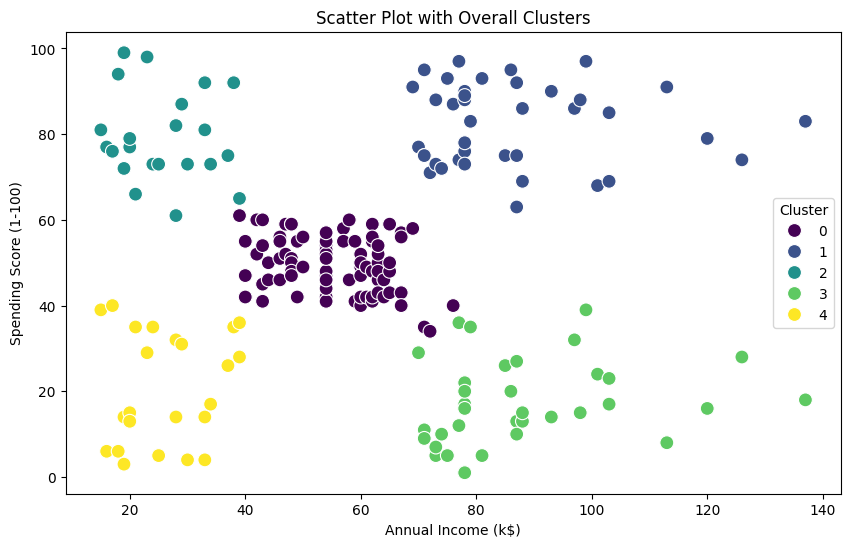

In [ ]:
import matplotlib.pyplot as plt
# Scatter plot using the overall clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Scatter Plot with Overall Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

##OBSERVATIONS
1. Clear Customer Segmentation<br>
  - Customers were grouped into distinct clusters based on Annual Income and Spending Score.

  - Each cluster reflects a specific behavioral pattern and purchasing potential.


 2. Identification of Target Customers<br>
- One cluster clearly represented high-income, high-spending customers.

  - These are ideal for premium product targeting, loyalty programs, and personalized offers.


 3. Discovery of Underutilized Segments<br>
- A cluster with high-income but low-spending customers was identified.

  - Indicates an opportunity to improve marketing communication or customer experience to convert them into high-value customers.


 4. Insights into Budget Shoppers
- A segment with low-income but high-spending behavior was also discovered.

  - Can be targeted with budget-friendly products, offers, or EMI options.


 5. Enhanced Marketing Strategy
Based on cluster behavior, a personalized marketing approach can be designed:

  - Premium campaigns for high spenders

  - Value packs for moderate-income customers

**Discount deals for budget segments**

 6. Data-Driven Decision Making<br>
- Business strategies can now be backed by data and cluster insights, rather than assumptions.

  - Better allocation of resources toward profitable and responsive customer segments.


 7. Simplified Customer Profiling<br>
- Each cluster creates a customer persona (e.g., "Loyal High Spenders", "Frugal Earners", "Potential Upsell Customers") to help teams understand and communicate strategies easily.

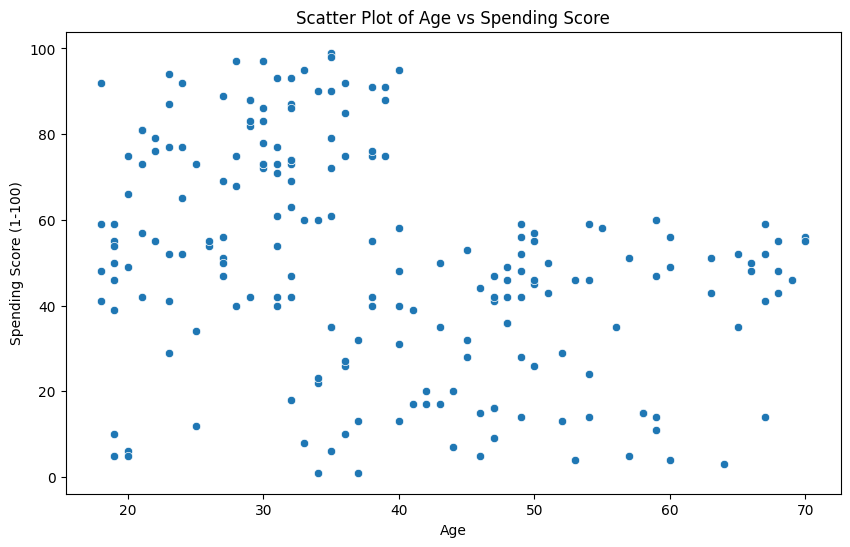

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Scatter Plot of Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

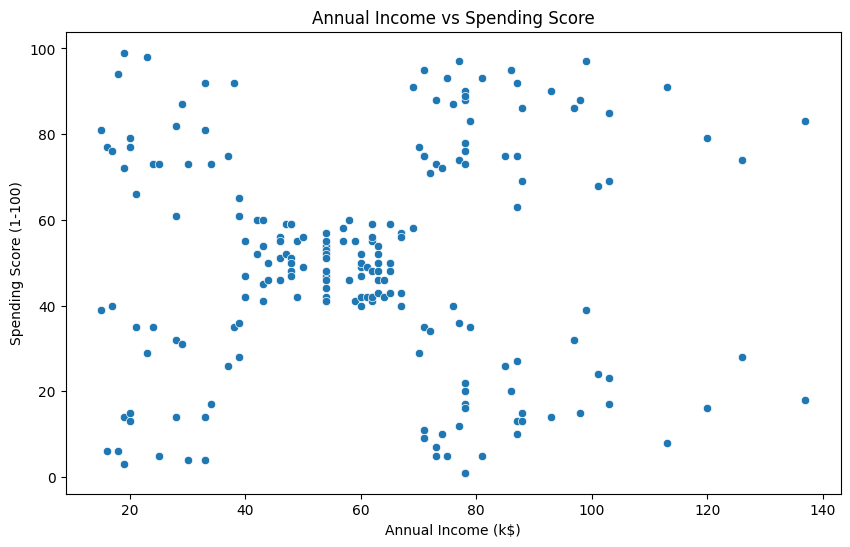

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#**5b.Data Clustering (Using Dbscan)**

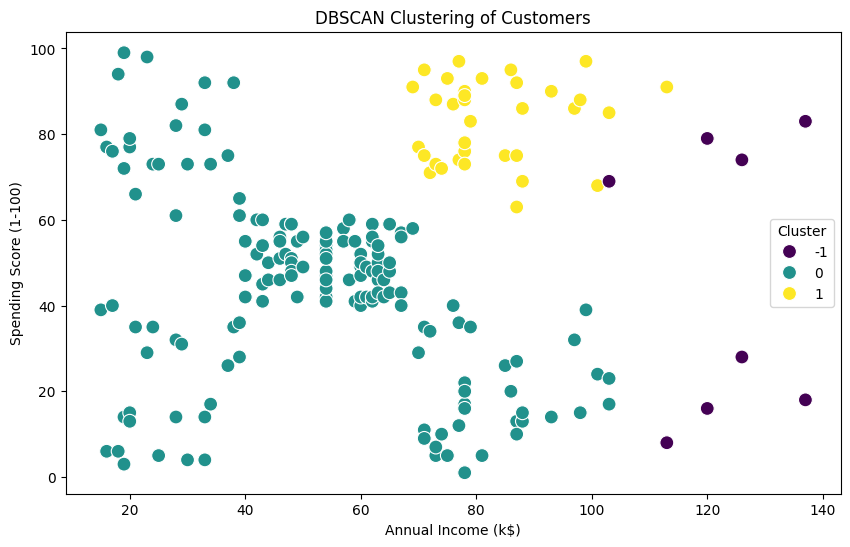


Number of data points in each DBSCAN cluster:
DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
X_dbscan = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features. DBSCAN is sensitive to scale.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dbscan)

# Apply DBSCAN clustering
# You need to choose appropriate values for eps and min_samples
# eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples is the number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
dbscan = DBSCAN(eps=0.5, min_samples=5) # Example values, you may need to tune these
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Plot the clusters using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='viridis', s=100)
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# The cluster label -1 indicates noise points.
print("\nNumber of data points in each DBSCAN cluster:")
print(df['DBSCAN_Cluster'].value_counts())

##OBSERVATION
Optionally, i tried to analyse the dataset using Dbscan ,but it gave some improper output and this is hard to understand this analysis

- kmeans is better than dbscan for this dataset

#**6.Final Observation**
From the above analysis, we can suggest

#Strategy plan for the Marketing Team

**Based on customer segmentation using K-Means, the following strategies are recommended:**

- Target high-value customers (high income & spending) with premium offers, loyalty programs, and personalized experiences.

- Engage untapped segments (high income, low spending) through value-focused promotions and incentives.

- Attract impulse buyers (low income, high spending) using discounts, flash sales, and reward programs.

- Minimize cost on low-potential groups (low income, low spending) with mass promotions and community events.

- Nurture average customers with upselling, seasonal campaigns, and personalized deals.

- Use CRM tools, social media targeting, and A/B testing to refine campaigns and increase ROI.

This segmentation-based strategy enables more personalized, effective, and profitable marketing.










